In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# Step 1: Load the dataset into a DataFrame
data = pd.read_csv('train.csv')

# Display First few rows 
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
# Display Last few rows 
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [20]:
# Step 2: Data Cleaning
# Let's start by checking the missing values in the dataset
print(data.isnull().sum())

# Fill missing values for 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop unnecessary columns that won't contribute to the analysis
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Exploring the relationships between variables and identify patterns and trends in the data

Survival Rate:
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


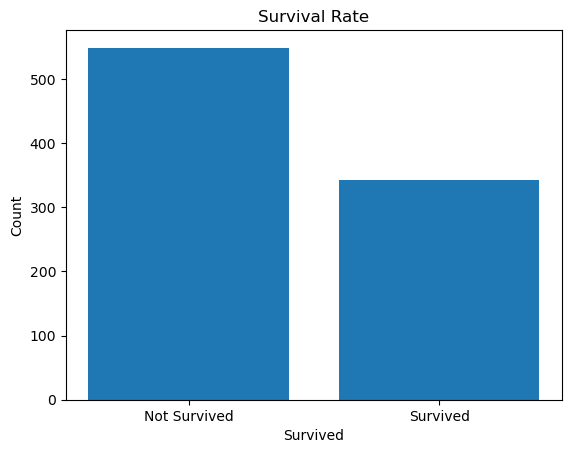

In [23]:
# Checking the overall survival rate
survival_rate = data['Survived'].value_counts(normalize=True) * 100
print(f"Survival Rate:\n{survival_rate}")

# Visualizing the survival rate
plt.bar(['Not Survived', 'Survived'], data['Survived'].value_counts())
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Rate')
plt.show()

Survival Rate by Pclass:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


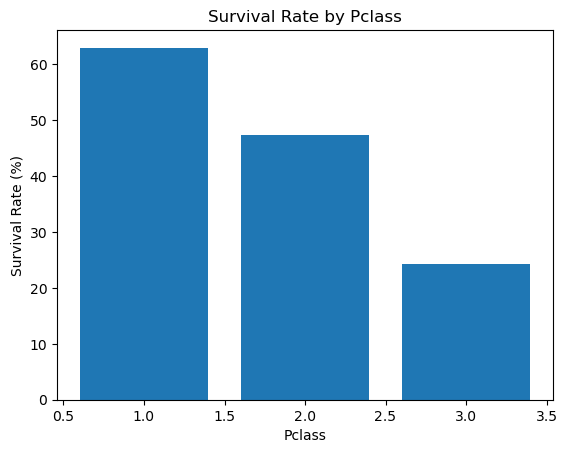

In [24]:
# Exploring the relationship between 'Pclass' and 'Survived'
pclass_survived = data.groupby('Pclass')['Survived'].mean() * 100
print(f"Survival Rate by Pclass:\n{pclass_survived}")

# Visualizing the relationship between 'Pclass' and 'Survived'
plt.bar(pclass_survived.index, pclass_survived.values)
plt.xlabel('Pclass')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Pclass')
plt.show()

Survival Rate by Sex:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


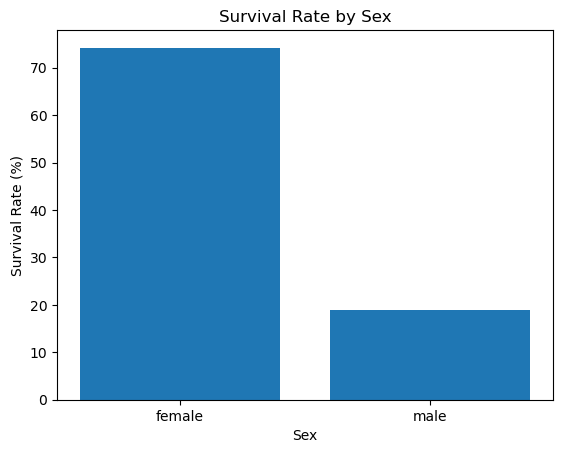

In [25]:
# Exploring the relationship between 'Sex' and 'Survived'
sex_survived = data.groupby('Sex')['Survived'].mean() * 100
print(f"Survival Rate by Sex:\n{sex_survived}")

# Visualizing the relationship between 'Sex' and 'Survived'
plt.bar(sex_survived.index, sex_survived.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate (%)')
plt.title('Survival Rate by Sex')
plt.show()

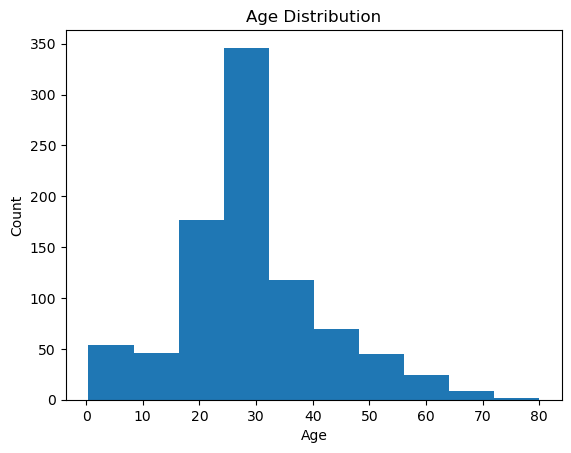

In [28]:
# Exploring the age distribution of passengers
plt.hist(data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

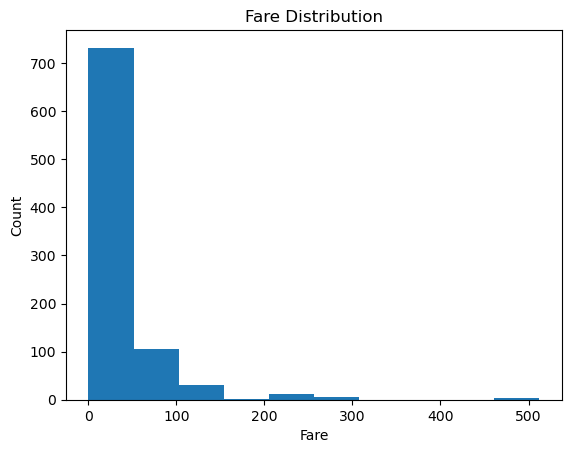

In [32]:
# Explorinng the fare distribution of passengers
plt.hist(data['Fare'], bins=10)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.title('Fare Distribution')
plt.show()

In [33]:
%matplotlib inline

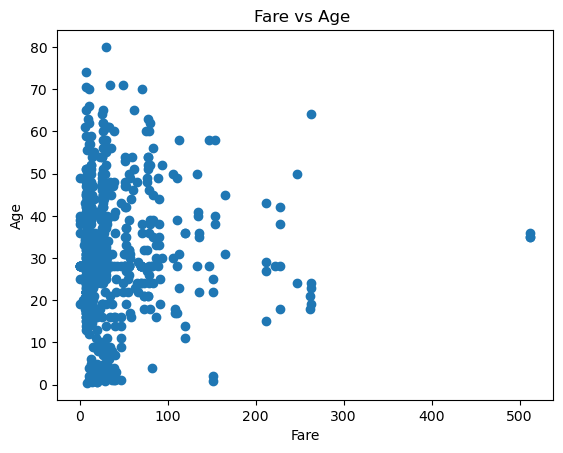

In [34]:
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.Fare, data.Age)

# Label the axes
ax.set(xlabel='Fare',
       ylabel='Age',
       title='Fare vs Age ');
### END SOLUTION

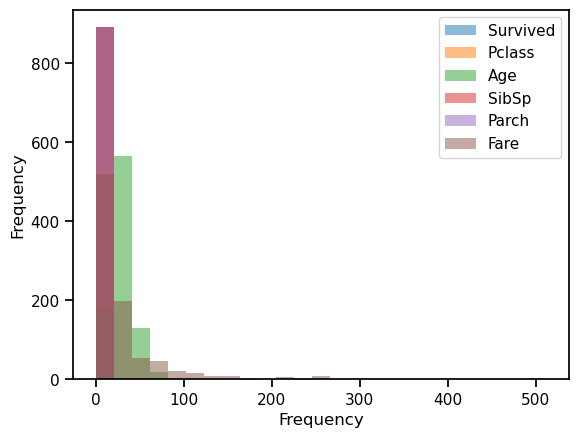

In [36]:
import seaborn as sns
sns.set_context('notebook')
### BEGIN SOLUTION
# This uses the `.plot.hist` method
ax = data.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Frequency');

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

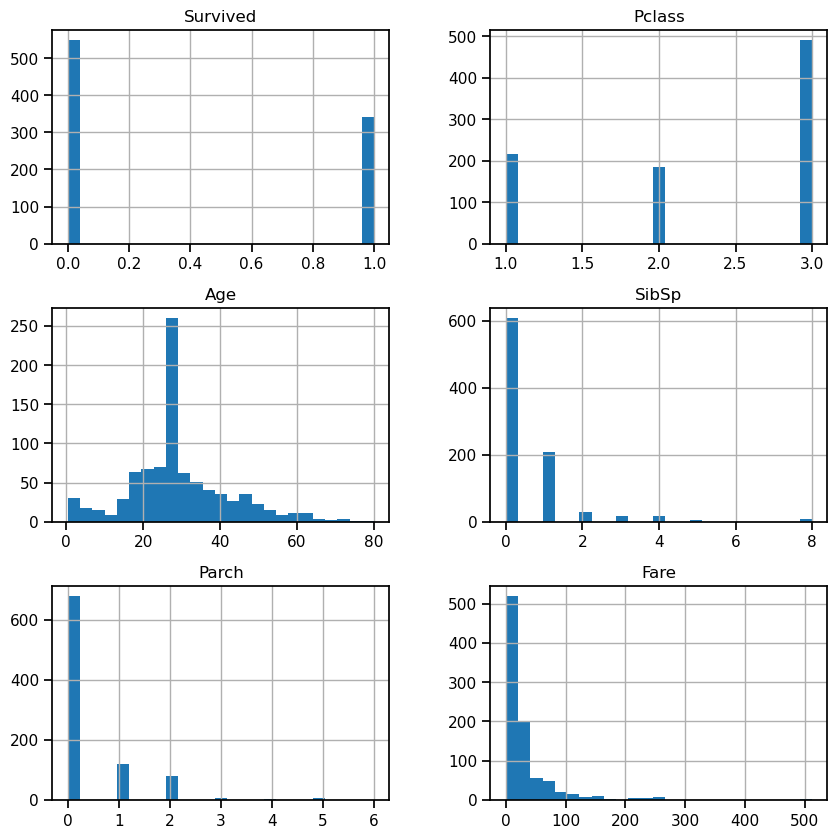

In [42]:
data.hist(bins=25,figsize = (10,10))